# Project Exploratory Data Analysis

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period. This is done to avoid any tendency to a specific campaign, special day, user profile, or period.

Origin: UCI Machine Learning Repository File Type: CSV File Size: 1.2 MB Modeling Problem: Classification Missing Values: Yes

Attributes: “Administrative”, “Administrative Duration”, “Informational”, “Informational Duration”, “Product Related”, “Product Related Duration”

The above variables represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The “Bounce Rate”, “Exit Rate” and “Page Value” features represent the metrics measured by “Google Analytics” for each page in the e-commerce site.

The value of “Bounce Rate” feature for a web page refers to the percentage of visitors who enter the site from that page and then leave (“bounce”) without triggering any other requests to the analytics server during that session.

The value of “Exit Rate” feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

The “Page Value” feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The “Special Day” feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine’s Day) in which the sessions are more likely to be finalized with transaction.

The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.

For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year. The “Revenue” is a binary field and dependent variable, indicating TRUE for a sale taking place and FALSE for no sale.

In [111]:
import pandas as pd
#Remove error code for copying dfs
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Import seaborn package for pretty charts
import seaborn as sns
sns.set_theme(style="whitegrid")

#Find my file location 
file_loc = "/Users/Brandoneius/Documents/Masters Program/Programming For Data Science/online_shoppers_intention.csv"

#Load file into a data frame
df = pd.read_csv(file_loc)

#Initial Look at the data
df.describe()
df.count()

Administrative             12330
Administrative_Duration    12330
Informational              12202
Informational_Duration     12330
ProductRelated             12330
ProductRelated_Duration    12330
BounceRates                12330
ExitRates                  12330
PageValues                 12195
SpecialDay                 12330
Month                      12330
OperatingSystems           12207
Browser                    12330
Region                     12330
TrafficType                12330
VisitorType                12330
Weekend                    12330
Revenue                    12330
dtype: int64

In [112]:
#Find the columns that have NA values
#No NAs in the columns of interest for our regression
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

# Regression Function
ProductRelated_Duration = B0 + B1(productRelated)  + B2(BounceRate) + B3(ExitRate)

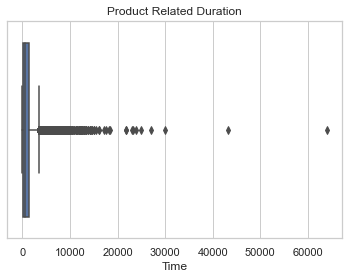

In [113]:
#Look at data for product relation duration
box1 = sns.boxplot(x=df.ProductRelated_Duration)
box1.set(xlabel='Time', title='Product Related Duration')
plt.show() 

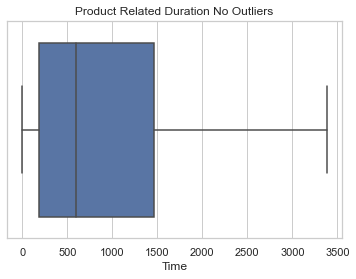

In [114]:
#Boxplot without outliers
box2 = sns.boxplot(x=df.ProductRelated_Duration,showfliers=False)
box2.set(xlabel='Time', title='Product Related Duration No Outliers')
plt.show() 
#Probably want to remove the extreme outliers from the product relation duration.

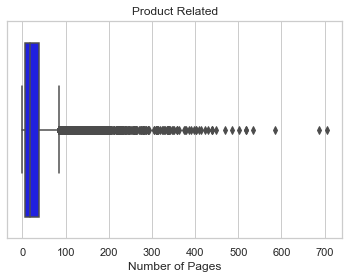

In [115]:
#Looking at product related 
box3 = sns.boxplot(x=df.ProductRelated, color='blue')
box3.set(xlabel='Number of Pages', title='Product Related')
plt.show()

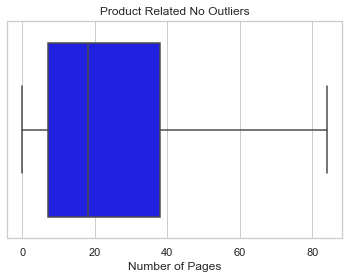

In [116]:
#Looking at product related 
box3 = sns.boxplot(x=df.ProductRelated, color='blue', showfliers=False)
box3.set(xlabel='Number of Pages', title='Product Related No Outliers')
plt.show()

In [117]:
df.ProductRelated.describe()

count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

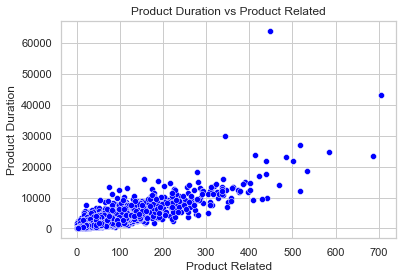

In [118]:
scatter2 = sns.scatterplot(x=df["ProductRelated"], y=df["ProductRelated_Duration"], color='blue')
scatter2.set(xlabel='Product Related', ylabel='Product Duration', title='Product Duration vs Product Related')
plt.show()

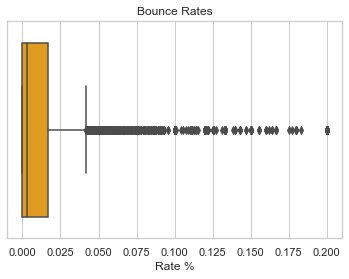

In [119]:
#Look at the other variabes
#BounceRate
box4 = sns.boxplot(x=df.BounceRates, color='orange')
box4.set(xlabel='Rate %', title='Bounce Rates')
plt.show()

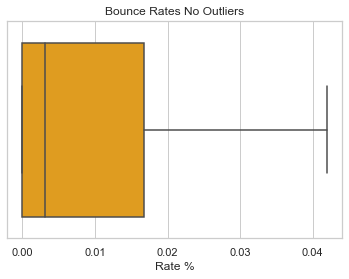

In [120]:
#Look at the other variabes
#BounceRate
box5 = sns.boxplot(x=df.BounceRates, showfliers=False,color='orange')
box5.set(xlabel='Rate %', title='Bounce Rates No Outliers')
plt.show()
#A pretty large range outside of the 4th quartile
#Where is the first quartile? A lot of 0s? 

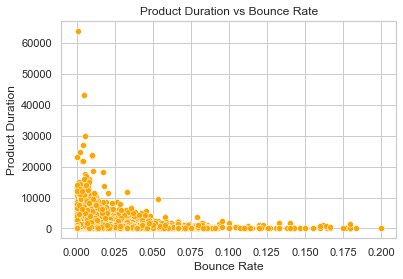

In [121]:
scatter3 = sns.scatterplot(x=df["BounceRates"], y=df["ProductRelated_Duration"],color='orange')
scatter3.set(xlabel='Bounce Rate', ylabel='Product Duration', title='Product Duration vs Bounce Rate')
plt.show()

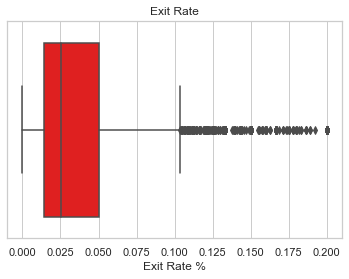

In [122]:
#Exit
box5 = sns.boxplot(x=df.ExitRates, color='red')
box5.set(xlabel='Exit Rate %', title='Exit Rate')
plt.show()
#A pretty large range outside of the 4th quartile

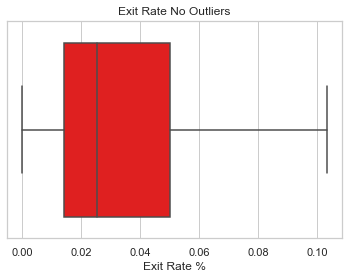

In [123]:
#Exit
box6 = sns.boxplot(x=df.ExitRates, showfliers=False,color='red')
box6.set(xlabel='Exit Rate %', title='Exit Rate No Outliers')
plt.show()
#Smaller range outside of the 3rd quartile

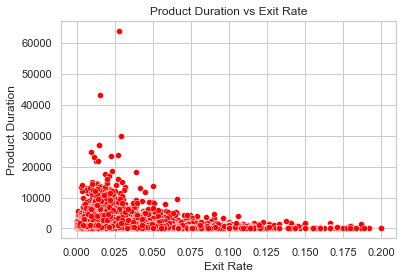

In [124]:
scatter4 = sns.scatterplot(x=df["ExitRates"], y=df["ProductRelated_Duration"],color='red')
scatter4.set(xlabel='Exit Rate', ylabel='Product Duration', title='Product Duration vs Exit Rate')
plt.show()

# Clean Up Outliers For Our Variables


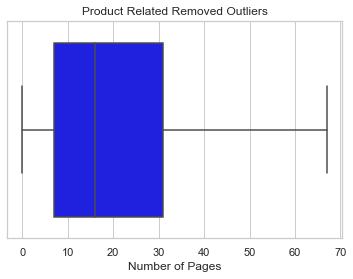

In [125]:
Q1 = df['ProductRelated'].quantile(0.25)
Q3 = df['ProductRelated'].quantile(0.75)
IQR = Q3 - Q1

df_product_remove  = df[(df['ProductRelated'] < Q3 + IQR * 1.5) & (df['ProductRelated'] > Q1 - IQR * 1.5)]

boxClean1 = sns.boxplot(x=df_product_remove.ProductRelated, color='blue', showfliers=False)
boxClean1.set(xlabel='Number of Pages', title='Product Related Removed Outliers')
plt.show()

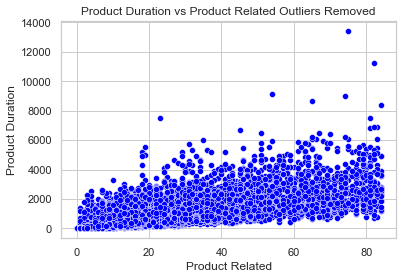

In [126]:
scatter1Clean = sns.scatterplot(x=df_product_remove["ProductRelated"], y=df_product_remove["ProductRelated_Duration"], color='blue')
scatter1Clean.set(xlabel='Product Related', ylabel='Product Duration', title='Product Duration vs Product Related Outliers Removed')
plt.show()

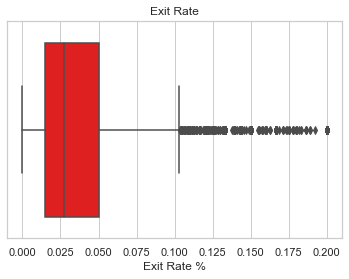

In [127]:
#Checking for exit rates to see if there is still outliers
#Yes, going to use the same method to remove them. 
boxChecking1 = sns.boxplot(x=df_product_remove.ExitRates, color='red')
boxChecking1.set(xlabel='Exit Rate %', title='Exit Rate')
plt.show()

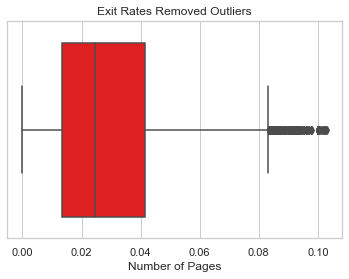

In [128]:
Q1 = df_product_remove['ExitRates'].quantile(0.25)
Q3 = df_product_remove['ExitRates'].quantile(0.75)
IQR = Q3 - Q1

df_exit_remove  = df_product_remove[(df_product_remove['ExitRates'] < Q3 + IQR * 1.5) & (df_product_remove['ExitRates'] > Q1 - IQR * 1.5)]

boxClean2 = sns.boxplot(x=df_exit_remove.ExitRates, color='red')
boxClean2.set(xlabel='Number of Pages', title='Exit Rates Removed Outliers')
plt.show()


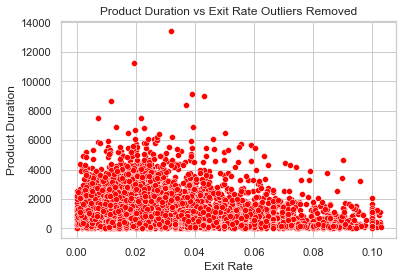

In [129]:
scatter2Clean = sns.scatterplot(x=df_exit_remove["ExitRates"], y=df_exit_remove["ProductRelated_Duration"],color='red')
scatter2Clean.set(xlabel='Exit Rate', ylabel='Product Duration', title='Product Duration vs Exit Rate Outliers Removed')
plt.show()


#Better than before, hard to tell a correlation from this

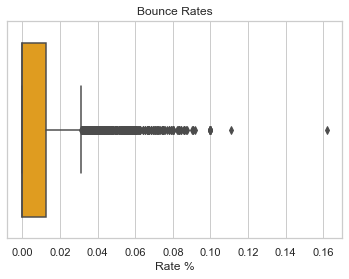

In [130]:
#Checking for exit rates to see if there is still outliers
#Yes, going to use the same method to remove them. 
boxChecking2 = sns.boxplot(x=df_exit_remove.BounceRates, color='orange')
boxChecking2.set(xlabel='Rate %', title='Bounce Rates')
plt.show()

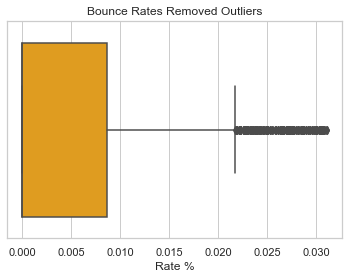

In [131]:
Q1 = df_exit_remove['BounceRates'].quantile(0.25)
Q3 = df_exit_remove['BounceRates'].quantile(0.75)
IQR = Q3 - Q1

df_bounce_remove  = df_exit_remove[(df_exit_remove['BounceRates'] < Q3 + IQR * 1.5) & (df_exit_remove['BounceRates'] > Q1 - IQR * 1.5)]

boxClean2 = sns.boxplot(x=df_bounce_remove.BounceRates, color='orange')
boxClean2.set(xlabel='Rate %', title='Bounce Rates Removed Outliers')
plt.show()

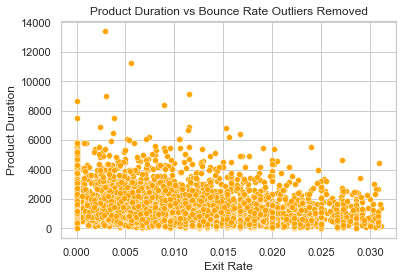

In [132]:
scatter3Clean = sns.scatterplot(x=df_bounce_remove["BounceRates"], y=df_bounce_remove["ProductRelated_Duration"],color='orange')
scatter3Clean.set(xlabel='Exit Rate', ylabel='Product Duration', title='Product Duration vs Bounce Rate Outliers Removed')
plt.show()

#Hard to tell if there is any correlation here

# Now look at Product Duration After Clean Up

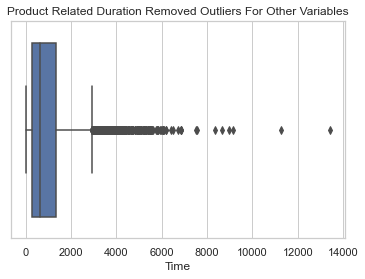

In [133]:
#Look at data for product relation duration
box1 = sns.boxplot(x=df_bounce_remove.ProductRelated_Duration)
box1.set(xlabel='Time', title='Product Related Duration Removed Outliers For Other Variables')
plt.show() 

#Still a lot of outliers, going to remove with the same method as the others 

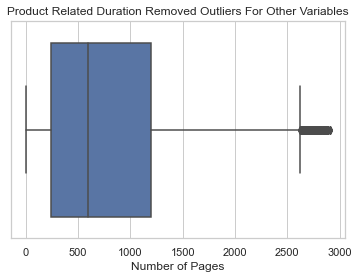

In [134]:
Q1 = df_bounce_remove['ProductRelated_Duration'].quantile(0.25)
Q3 = df_bounce_remove['ProductRelated_Duration'].quantile(0.75)
IQR = Q3 - Q1

df_final_outiers  = df_bounce_remove[(df_bounce_remove['ProductRelated_Duration'] < Q3 + IQR * 1.5) & (df_bounce_remove['ProductRelated_Duration'] > Q1 - IQR * 1.5)]

boxClean2 = sns.boxplot(x=df_final_outiers.ProductRelated_Duration)
boxClean2.set(xlabel='Number of Pages', title='Product Related Duration Removed Outliers For Other Variables')
plt.show()

#Removed a lot, still some outliers, but removed the way far outliers. 

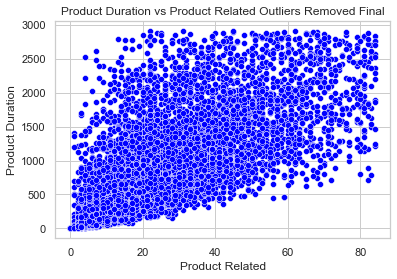

In [135]:
scatter1Final = sns.scatterplot(x=df_final_outiers["ProductRelated"], y=df_final_outiers["ProductRelated_Duration"], color='blue')
scatter1Final.set(xlabel='Product Related', ylabel='Product Duration', title='Product Duration vs Product Related Outliers Removed Final')
plt.show()

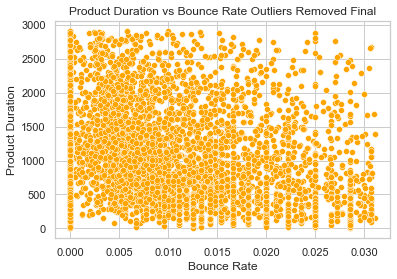

In [136]:
scatter2Final = sns.scatterplot(x=df_final_outiers["BounceRates"], y=df_final_outiers["ProductRelated_Duration"], color='orange')
scatter2Final.set(xlabel='Bounce Rate', ylabel='Product Duration', title='Product Duration vs Bounce Rate Outliers Removed Final')
plt.show()

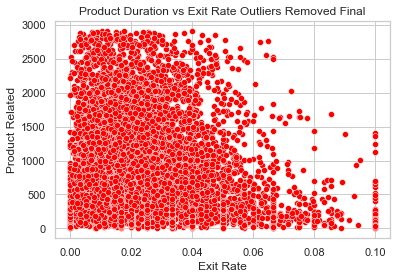

In [138]:
scatter3Final = sns.scatterplot(x=df_final_outiers["ExitRates"], y=df_final_outiers["ProductRelated_Duration"], color='red')
scatter3Final.set(xlabel='Exit Rate', ylabel='Product Related', title='Product Duration vs Exit Rate Outliers Removed Final')
plt.show()